we're going to start with the data cleaning:
- remove irrelevant columns
- merge duplicate columns
- handle null & NaN values
- Homogenize attribute names and values

In [24]:
import numpy as np 
import pandas as pd 

excel_file_path = 'Impact Survey Results .xlsx'
df = pd.read_excel(excel_file_path)
df

,How did you join the OST family?,What edition?,What edition?.1,What is your gender?,What is your hometown?,Where are you currently?,What is your main occupation?,What is your university?,What is your field of study?,Please specify,...,Did you raise funds for your startup?,Please indicate the amount in TND,Where did you raise these funds from?,Please specify.3,"After OST, did you join any other entrepreneurship competitions?",Please specify which one(s).1,"After OST, did you participate in any conferences, exchange programs, competitions or sponsored programs?.1",Please specify which one(s).2,"Finally, do you have any suggestions on how OST can support you in your journey?.1",How helpful was OST in this process?
0,OST Pre-incubator,NaN,NaN,Female,Tunis,Tunisia,I founded/co-founded a startup,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,1.0,"Impact Partner, ATUGE, GBSN",0.0,NaN,Good vibes and a potential deal!,4.0
1,OST competition,OST 3,NaN,Female,Tunis,Tunisia,Studying,Fsegt el manar,Business,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OST Pre-incubator,NaN,NaN,Male,Tunis,Tunisia,Studying,Esprit,Engineering,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OST Pre-incubator,NaN,NaN,Female,Ben Arous,Tunisia,I founded/co-founded a startup,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,1.0,Hult Prize/ Biat Labs,0.0,NaN,OST can support me in my journey just by being...,NaN
4,OST Pre-incubator,NaN,NaN,Male,Tunis,Tunisia,Working/doing an internship,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,OST Pre-incubator,NaN,NaN,Female,Nabeul,Tunisia,I founded/co-founded a startup,NaN,NaN,NaN,...,1.0,200000.0,Flat6,NaN,0.0,NaN,1.0,SIBC,"Networking, Visibility, business expertise, le...",NaN
497,OST competition,OST 3,NaN,Female,Nabeul,Tunisia,I founded/co-founded a startup,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,Networking & coaching,NaN
498,OST competition,OST 3,NaN,Male,Nabeul,Abroad,Studying,Minneapolis College of Art and Design,Art & Design,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,OST competition,OST 1,NaN,Female,Tunis,Abroad,I founded/co-founded a startup,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,1.0,Paris lauréate,0.0,NaN,No,NaN


In [25]:
df.shape

(501, 71)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 71 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   How did you join the OST family?                                                                             501 non-null    object 
 1   What edition?                                                                                                146 non-null    object 
 2   What edition?.1                                                                                              182 non-null    object 
 3   What is your gender?                                                                                         501 non-null    object 
 4   What is your hometown?                                        

In [27]:
df.isnull().sum()

How did you join the OST family?                                                                                 0
What edition?                                                                                                  355
What edition?.1                                                                                                319
What is your gender?                                                                                             0
What is your hometown?                                                                                           0
                                                                                                              ... 
Please specify which one(s).1                                                                                  469
After OST, did you participate in any conferences, exchange programs, competitions or sponsored programs?.1    433
Please specify which one(s).2                                                   

<Axes: title={'center': '% of missing values'}, ylabel='percentage'>

c:\py_installation\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128064 (\N{EYES}) missing from current font.
  func(*args, **kwargs)
c:\py_installation\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  func(*args, **kwargs)
c:\py_installation\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  func(*args, **kwargs)
c:\py_installation\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  func(*args, **kwargs)
c:\py_installation\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128064 (\N{EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\py_installation\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\py_installation\Lib\site-p

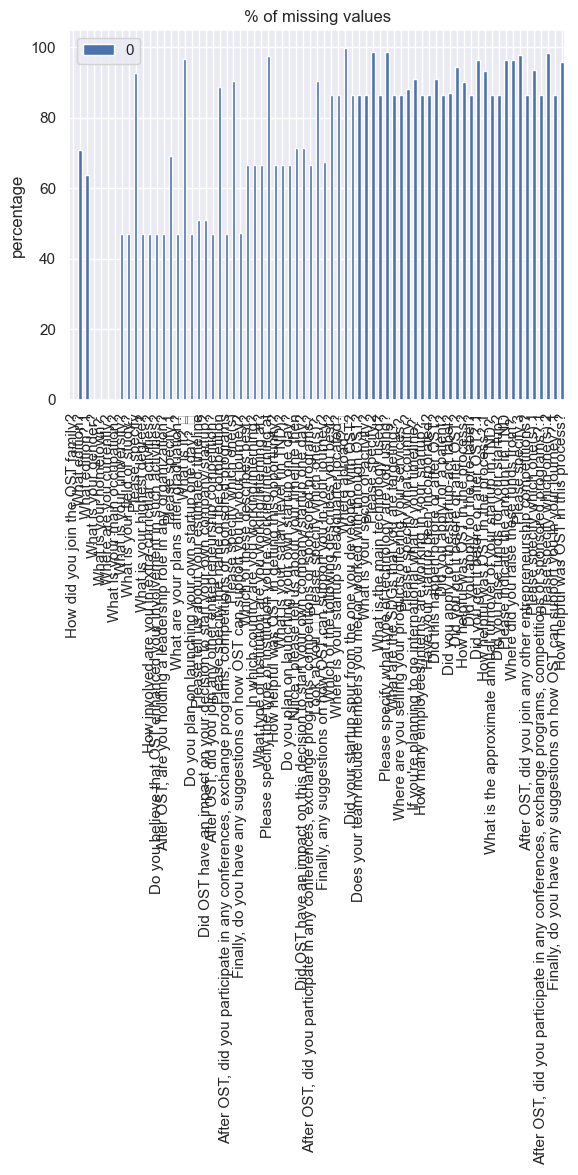

In [28]:
#Beaucoup de colonnes manquent de valeurs. Mais quelle importance cela a-t-il en fait ?
import seaborn as sns
sns.set()
miss_vals = pd.DataFrame(df.isnull().sum() / len(df) * 100)
miss_vals.plot(kind='bar',title='% of missing values',ylabel='percentage')


In [29]:
df['What edition?'].update(df['What edition?.1'])
df = df.drop(['What edition?.1'], axis=1)
df

,How did you join the OST family?,What edition?,What is your gender?,What is your hometown?,Where are you currently?,What is your main occupation?,What is your university?,What is your field of study?,Please specify,What is your highest degree?,...,Did you raise funds for your startup?,Please indicate the amount in TND,Where did you raise these funds from?,Please specify.3,"After OST, did you join any other entrepreneurship competitions?",Please specify which one(s).1,"After OST, did you participate in any conferences, exchange programs, competitions or sponsored programs?.1",Please specify which one(s).2,"Finally, do you have any suggestions on how OST can support you in your journey?.1",How helpful was OST in this process?
0,OST Pre-incubator,NaN,Female,Tunis,Tunisia,I founded/co-founded a startup,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,1.0,"Impact Partner, ATUGE, GBSN",0.0,NaN,Good vibes and a potential deal!,4.0
1,OST competition,OST 3,Female,Tunis,Tunisia,Studying,Fsegt el manar,Business,NaN,Masters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OST Pre-incubator,NaN,Male,Tunis,Tunisia,Studying,Esprit,Engineering,NaN,Engineering,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OST Pre-incubator,NaN,Female,Ben Arous,Tunisia,I founded/co-founded a startup,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,1.0,Hult Prize/ Biat Labs,0.0,NaN,OST can support me in my journey just by being...,NaN
4,OST Pre-incubator,NaN,Male,Tunis,Tunisia,Working/doing an internship,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,OST Pre-incubator,NaN,Female,Nabeul,Tunisia,I founded/co-founded a startup,NaN,NaN,NaN,NaN,...,1.0,200000.0,Flat6,NaN,0.0,NaN,1.0,SIBC,"Networking, Visibility, business expertise, le...",NaN
497,OST competition,OST 3,Female,Nabeul,Tunisia,I founded/co-founded a startup,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,Networking & coaching,NaN
498,OST competition,OST 3,Male,Nabeul,Abroad,Studying,Minneapolis College of Art and Design,Art & Design,NaN,Masters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,OST competition,OST 1,Female,Tunis,Abroad,I founded/co-founded a startup,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,1.0,Paris lauréate,0.0,NaN,No,NaN


In [30]:
# Identify columns with the same name
duplicated_columns = df.columns[df.columns.duplicated()].unique()

# Merge columns with the same name
for col in duplicated_columns:
    df[col] = df.groupby(col)[col].transform(lambda x: ', '.join(x.dropna().astype(str)))

# Drop duplicated columns (keeping only the merged ones)
df = df.loc[:, ~df.columns.duplicated()]

df

,How did you join the OST family?,What edition?,What is your gender?,What is your hometown?,Where are you currently?,What is your main occupation?,What is your university?,What is your field of study?,Please specify,What is your highest degree?,...,Did you raise funds for your startup?,Please indicate the amount in TND,Where did you raise these funds from?,Please specify.3,"After OST, did you join any other entrepreneurship competitions?",Please specify which one(s).1,"After OST, did you participate in any conferences, exchange programs, competitions or sponsored programs?.1",Please specify which one(s).2,"Finally, do you have any suggestions on how OST can support you in your journey?.1",How helpful was OST in this process?
0,OST Pre-incubator,NaN,Female,Tunis,Tunisia,I founded/co-founded a startup,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,1.0,"Impact Partner, ATUGE, GBSN",0.0,NaN,Good vibes and a potential deal!,4.0
1,OST competition,OST 3,Female,Tunis,Tunisia,Studying,Fsegt el manar,Business,NaN,Masters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OST Pre-incubator,NaN,Male,Tunis,Tunisia,Studying,Esprit,Engineering,NaN,Engineering,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OST Pre-incubator,NaN,Female,Ben Arous,Tunisia,I founded/co-founded a startup,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,1.0,Hult Prize/ Biat Labs,0.0,NaN,OST can support me in my journey just by being...,NaN
4,OST Pre-incubator,NaN,Male,Tunis,Tunisia,Working/doing an internship,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,OST Pre-incubator,NaN,Female,Nabeul,Tunisia,I founded/co-founded a startup,NaN,NaN,NaN,NaN,...,1.0,200000.0,Flat6,NaN,0.0,NaN,1.0,SIBC,"Networking, Visibility, business expertise, le...",NaN
497,OST competition,OST 3,Female,Nabeul,Tunisia,I founded/co-founded a startup,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,Networking & coaching,NaN
498,OST competition,OST 3,Male,Nabeul,Abroad,Studying,Minneapolis College of Art and Design,Art & Design,NaN,Masters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,OST competition,OST 1,Female,Tunis,Abroad,I founded/co-founded a startup,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,1.0,Paris lauréate,0.0,NaN,No,NaN


In [31]:
# Count the number of columns with too much missing values
columns_with_half_missing = df.columns[df.isnull().sum()>=450]

number_of_columns_with_half_missing = len(columns_with_half_missing)

# Display the result
print(f"Number of columns with half missing values: {number_of_columns_with_half_missing}")

Number of columns with half missing values: 20


In [32]:
# print(f'Size of the dataset: {df.shape}')
# df = df.drop(columns=columns_with_half_missing)
# print(f'Size of the dataset after dropping half empty columns: {df.shape}')
# df











In [33]:
unique_osts = df['How did you join the OST family?'].unique()
print(unique_osts)

['OST Pre-incubator' 'OST competition' 'OSTX']


In [34]:
columns_with_all_null = df.columns[df.isnull().all()]
print("Columns with all null values:")
print(columns_with_all_null)


Columns with all null values:
Index([], dtype='object')


In [35]:
# How many people went to found startups
ps = (df['What is your main occupation?'] == 'I founded/co-founded a startup').sum()
print(f"Number of participants that went on to found their own startups: {ps}")


Number of participants that went on to found their own startups: 68


In [36]:
# How many females went to found startups
count_of_value = ((df['What is your main occupation?'] == 'I founded/co-founded a startup') & (df['What is your gender?']=='Female')).sum()
print(f"Number of female participants that went on to found their own startups: {count_of_value}")


Number of female participants that went on to found their own startups: 26


In [37]:
# How many males went to found startups
count_of_value = ((df['What is your main occupation?'] == 'I founded/co-founded a startup') & (df['What is your gender?']=='Male')).sum()
print(f"Number of male participants that went on to found their own startups: {count_of_value}")

Number of male participants that went on to found their own startups: 42


In [38]:

df.replace(0, np.nan, inplace=True)
df.replace("", np.nan, inplace=True)

df.dropna(how='all', axis=1, inplace=True)

df

,How did you join the OST family?,What edition?,What is your gender?,What is your hometown?,Where are you currently?,What is your main occupation?,What is your university?,What is your field of study?,Please specify,What is your highest degree?,...,Did you raise funds for your startup?,Please indicate the amount in TND,Where did you raise these funds from?,Please specify.3,"After OST, did you join any other entrepreneurship competitions?",Please specify which one(s).1,"After OST, did you participate in any conferences, exchange programs, competitions or sponsored programs?.1",Please specify which one(s).2,"Finally, do you have any suggestions on how OST can support you in your journey?.1",How helpful was OST in this process?
0,OST Pre-incubator,NaN,Female,Tunis,Tunisia,I founded/co-founded a startup,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,"Impact Partner, ATUGE, GBSN",NaN,NaN,Good vibes and a potential deal!,4.0
1,OST competition,OST 3,Female,Tunis,Tunisia,Studying,Fsegt el manar,Business,NaN,Masters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OST Pre-incubator,NaN,Male,Tunis,Tunisia,Studying,Esprit,Engineering,NaN,Engineering,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OST Pre-incubator,NaN,Female,Ben Arous,Tunisia,I founded/co-founded a startup,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,Hult Prize/ Biat Labs,NaN,NaN,OST can support me in my journey just by being...,NaN
4,OST Pre-incubator,NaN,Male,Tunis,Tunisia,Working/doing an internship,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,OST Pre-incubator,NaN,Female,Nabeul,Tunisia,I founded/co-founded a startup,NaN,NaN,NaN,NaN,...,1.0,200000.0,Flat6,NaN,NaN,NaN,1.0,SIBC,"Networking, Visibility, business expertise, le...",NaN
497,OST competition,OST 3,Female,Nabeul,Tunisia,I founded/co-founded a startup,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Networking & coaching,NaN
498,OST competition,OST 3,Male,Nabeul,Abroad,Studying,Minneapolis College of Art and Design,Art & Design,NaN,Masters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,OST competition,OST 1,Female,Tunis,Abroad,I founded/co-founded a startup,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,Paris lauréate,NaN,NaN,No,NaN


In [39]:
# Remove leading/trailing whitespaces from all column names
df.columns = df.columns.str.strip()

In [40]:
unique_fields = df['What is your field of study?'].unique()
print(unique_fields)

[nan 'Business' 'Engineering' 'Other' 'Humanities' 'Architecture'
 'Healthcare' 'Art & Design']


In [41]:
# How many went to found startups
count_of_value = ((df['How involved are you in extra-curricular activities?'] == 4) | (df['How involved are you in extra-curricular activities?']==5)).sum()
print(f"Number of participants that are very involved in extracurricular activities: {count_of_value}")


Number of participants that are very involved in extracurricular activities: 164


In [42]:
unique_fields = df['What is your sector of activity?'].unique()
print(unique_fields)

['EdTech' nan 'Transportation' 'Media & Communication' 'Tourism & Travel'
 'Other' 'Environment & Energy' 'Services'
 'Technologies & Telecommunications' 'Industry' 'SportsTech' 'HealthTech'
 'AgriTech']


In [43]:
# How many males went to found startups
count_of_value = ((df['What is your main occupation?'] == 'I founded/co-founded a startup') & (df['What is your sector of activity?']=='EdTech')).sum()
print(f"Number of male participants that went on to found their own startups: {count_of_value}")

Number of male participants that went on to found their own startups: 14


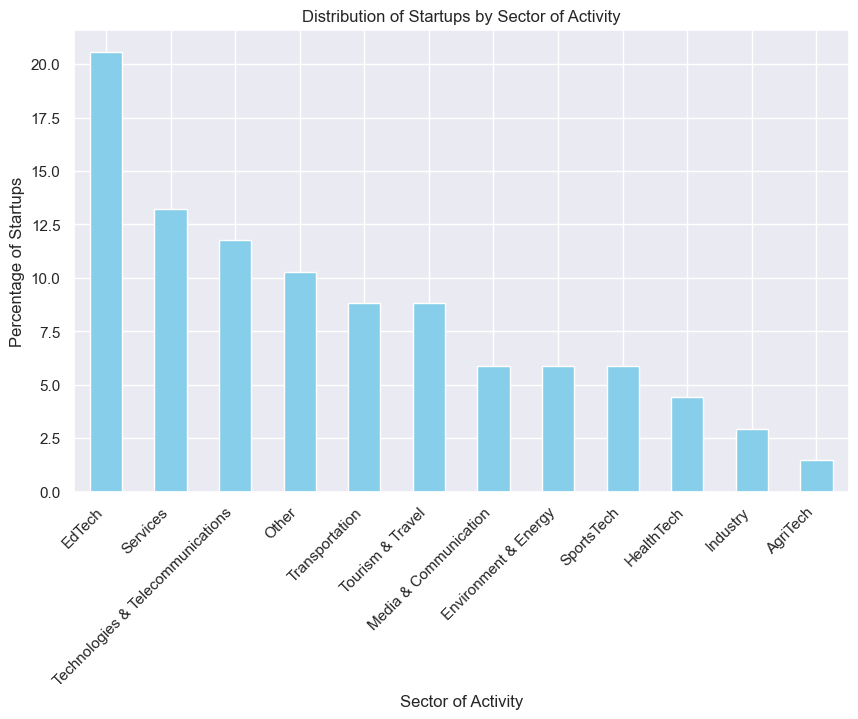

In [44]:
import matplotlib.pyplot as plt
sector_counts = df['What is your sector of activity?'].value_counts()

# Calculate the percentage of startups in each sector
sector_percentages = (sector_counts / sector_counts.sum()) * 100

plt.figure(figsize=(10, 6))
sector_percentages.plot(kind='bar', color='skyblue')
plt.title('Distribution of Startups by Sector of Activity')
plt.xlabel('Sector of Activity')
plt.ylabel('Percentage of Startups')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

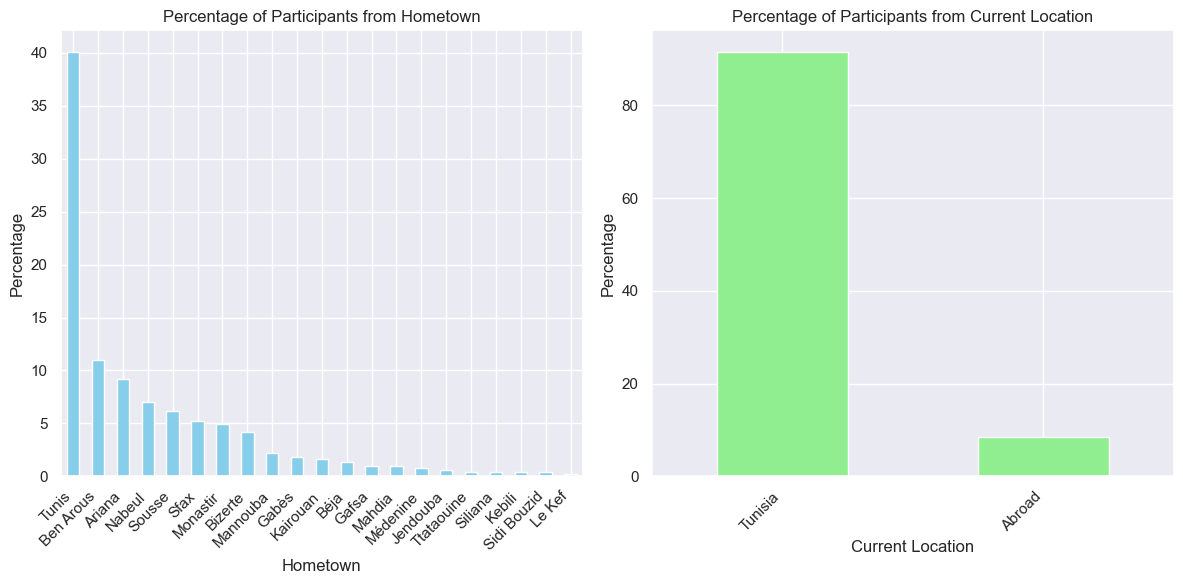

In [45]:
hometown_percentages = df['What is your hometown?'].value_counts(normalize=True) * 100
current_location_percentages = df['Where are you currently?'].value_counts(normalize=True) * 100

# Plot the data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
hometown_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Participants from Hometown')
plt.xlabel('Hometown')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
current_location_percentages.plot(kind='bar', color='lightgreen')
plt.title('Percentage of Participants from Current Location')
plt.xlabel('Current Location')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

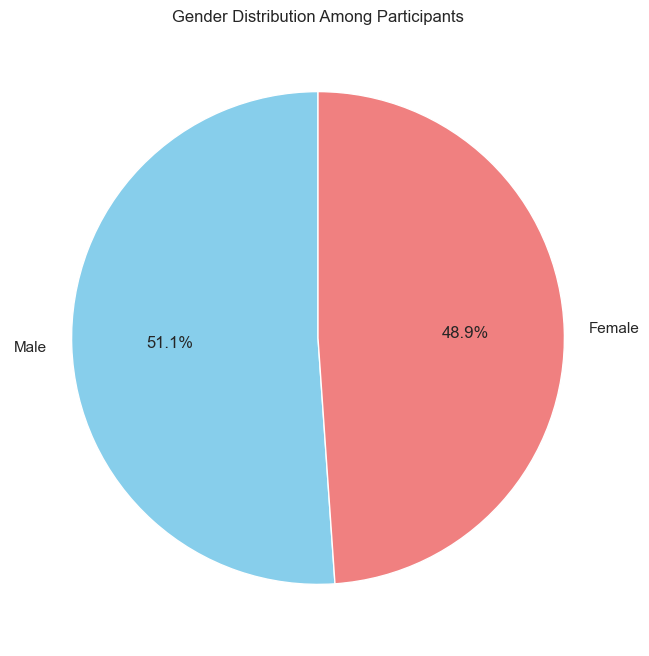

In [46]:
# Count the occurrences of each gender
gender_counts = df['What is your gender?'].value_counts()

# Plot the data in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution Among Participants')
plt.show()

In [47]:
unique_fields = df['What is your university?'].unique()
print(unique_fields)

[nan 'Fsegt el manar' 'Esprit' 'Tunis business school' 'IFID'
 'IHEC carthage' 'ISET Rades' 'Isi Ariana'
 'Higher Institut of computer science el manar' 'tbs' 'ISSHT' 'ESPRIT'
 'TBS' 'Insat' 'Fsegt' 'Esc tunis' 'ENIT'
 "ESPRIT : Ecole Sup Privée d'Ingénierie et de Technologies"
 'Tunis Business School' 'ISAAS' 'Fst' 'ISLT' 'ENISo' 'IHEC Carthage'
 'Faculty of Sciences of Tunis - FST'
 "École Nationale d'architecture et d'urbanisme"
 'Esprit School of Business' 'National school of engineering of Sfax'
 'FST' 'Ihec sousse' 'ISAM Manouba'
 'Higher institute of computer science and multimedia'
 'Esprit school of Business'
 'Higher Institute of Computer Science, Ariana (ISI Ariana)' 'Fseg Tunis'
 'ihec carthage' 'ihec sousse' 'ISG Tunis' 'ENSI' 'University of Debrecen'
 'isi ariana' 'Tunis Business school' 'esct'
 "école nationale d'architecture et d'urbanisme ENAU"
 'Biotechnology Institute of Sidi Thabet (ISBST)' 'ISCAE Manouba' 'ENSIT'
 'tek-up' 'isgt' 'Esct' 'ESEN MANOUBA'
 'National sc

In [48]:
value_mapping = {
    'Tbs': 'TBS',
    'Tunis Business School': 'TBS',
    'tbs': 'TBS',
    'Tunis business school': 'TBS',
    'tunis business school': 'TBS',
    'Tunis Business school': 'TBS',
    
    'Esc tunis': 'ESC',
    'Esc': 'ESC',
    'ESC': 'ESC',
    'Esc tunis.': 'ESC',
    'Esc tunisie': 'ESC',
    'Esc tunisia': 'ESC',
    'Esc tunisie.': 'ESC',
    'Esc tunisia.': 'ESC',
    'ESC Manouba': 'ESC',
    
    'Enit': 'ENIT',
    'Enit tunis': 'ENIT',
    'Enit tunisie': 'ENIT',
    'Enit tunisia': 'ENIT',
    'Enit tunis.': 'ENIT',
    'Enit tunisie.': 'ENIT',
    'Enit tunisia.': 'ENIT',

    
    'Fsegt el manar' :'FSEGT' ,
    'Fsegt': 'FSEGT',
    'FSEGT': 'FSEGT',
    'Fsegt manar': 'FSEGT',
    'FSEGT MANAR': 'FSEGT',
    'Fseg Tunis': 'FSEGT',
    'FSEG Manar': 'FSEGT',
    'FSEG Tunis': 'FSEGT',
    'FSEG': 'FSEGT',
    
    
    'Esprit':"ESB",
    'Esprit tunis': "ESB",
    'Esprit tunisie': "ESB",
    'Esprit tunisie.': "ESB",
    'ESPRIT': "ESB",
    'Esprit school of business': "ESB",
    'Esprit School of Business': "ESB",
    'Esprit School Of Business': "ESB",
    'Esprit School of Business.': "ESB",
    'Esprit School Of Business.': "ESB",
    'Esprit School of business': "ESB",
    'Esprit school of Business': "ESB",

    
    'Iset': 'ISET',
    'ISET Rades': 'ISET',
    'Iset rades': 'ISET',
    'Iset rades.': 'ISET',
    
    
    'IFID':'IFID',
    
    'Isi Ariana': 'ISI',
    'ISI': 'ISI',
    'Isi': 'ISI',
    'Isi ariana': 'ISI',
    'Higher Institut of computer science el manar': 'ISI',
    'Higher Institute of Computer Science, Ariana (ISI Ariana)': 'ISI',  
    'isi ariana': 'ISI', 
    
    'ISSHT': 'ISSHT',
    'Issht': 'ISSHT',
    'Issht tunis': 'ISSHT',
    'ISSHT Tunis': 'ISSHT',
    
    'IPEST': 'IPEST',
    'Ipest': 'IPEST',
    'Ipest tunis': 'IPEST',
    'Ipest tunisie': 'IPEST',
    'Ipest tunisia': 'IPEST',
    
    'IHEC Carthage': 'IHEC',
    'Ihec': 'IHEC',
    'IHEC': 'IHEC',
    'Ihec carthage': 'IHEC',
    'IHEC carthage': 'IHEC',
    'ihec carthage': 'IHEC',
    'ihec sousse': 'IHEC',
    'Ihec sousse': 'IHEC',
    'Ihec Sousse': 'IHEC',
    

    'essect': 'ESSECT',
    'Essect': 'ESSECT',
    'Essect.': 'ESSECT',
    'Essect tunis': 'ESSECT',
    'Essect tunisie': 'ESSECT',
    'Essect tunisia': 'ESSECT',
    
    'ENSTAB - école nationale des sciences et technologies avancées de Borj Cedria': 'ENSTAB',
    'Enstab': 'ENSTAB',
    
    'ISSHT': 'ISSHT',
    'Issht': 'ISSHT',
    
    'Fst': 'FST',
    'Faculty of Sciences of Tunis - FST': 'FST',
    'Faculty of Sciences of Tunis': 'FST',
    'Faculty of sciences el manar tunis': 'FST',
    'FST Bizerte': 'FST',
    'FST Tunis': 'FST',
    
    
    'Higher institute of computer science and multimedia': 'ISIMM',
     
    'ISAAS': 'ISAAS',
    'Isaas': 'ISAAS',
     
     
    'ENISo': 'ENISO',
    'National School of Engineers in Sousse(': 'ENISO',
    
    
    "École Nationale d'architecture et d'urbanisme": 'ENAU',
    "école nationale d'architecture et d'urbanisme ENAU": 'ENAU',
    'National school of architecture and urbanism of Tunis (ENAU)': 'ENAU',
     
    'University of Debrecen': 'University of Debrecen',

     
    'ISAM Manouba': 'ISAM',
    
    'Biotechnology Institute of Sidi Thabet (ISBST)': 'ISBST',
    'Biotechnology Institute of Sidi Thabet': 'ISBST',
    
    'MSB': 'MSB',
    'MsB': 'MSB',
    'MSB Tunis': 'MSB',
    'MSB': 'MSB',
    
    'Polytechnique Sousse' : 'Polytechnique',
    
    'Bcnlip language school': 'Bcnlip',
    
    'Higher institut of languages of Tunis': 'ISLT',
    'Higher institute of languages of Tunis': 'ISLT',
    
    'Université centrale': 'UC',
    'Université Centrale': 'UC',
    
    
    "SUP'COM": 'SUPCOM',
    'Supcom': 'SUPCOM',
    
    'Minneapolis College of Art and Design': 'MCAD',
    
    'Isamm': 'ISAMM',
    'ISAM': 'ISAMM',
    
    'ISTIC Borj Cedria': 'ISTIC',
    'Istic': 'ISTIC',
    
    'Centre de biotechnologie de borj cedria': 'CBB',
    
    'ISG': 'ISG',
    'ISG TUNIS': 'ISG',
    'isgt': 'ISG',
    
    
    'High school of biotechnology of sidi thabet': 'ISBST',
    
    'University of Arkansas': 'University of Arkansas',
    
    'ISCAE-MANOUBA': 'ISCAE',
    
    
    'Issat sousse': 'ISSAT',
    'Issatso': 'ISSAT',
    
    
    }

# Replace similar values with a common value
df['What is your university?'] = df['What is your university?'].replace(value_mapping)

In [49]:
unique_fields = df['What is your university?'].unique()
print(unique_fields)

[nan 'FSEGT' 'ESB' 'TBS' 'IFID' 'IHEC' 'ISET' 'ISI' 'ISSHT' 'Insat' 'ESC'
 'ENIT' "ESPRIT : Ecole Sup Privée d'Ingénierie et de Technologies"
 'ISAAS' 'FST' 'ISLT' 'ENISO' 'ENAU'
 'National school of engineering of Sfax' 'ISAM' 'ISIMM' 'ISG Tunis'
 'ENSI' 'University of Debrecen' 'esct' 'ISBST' 'ISCAE Manouba' 'ENSIT'
 'tek-up' 'ISG' 'Esct' 'ESEN MANOUBA' 'MSB' 'ISAMM'
 'the higher institute of biotechnology of sfax' 'ESCT' 'Polytechnique'
 'Ecole polytechnique centrale' 'National Engineering School of Sfax'
 'ESEN' 'Université Paris Dauphine Tunis' 'Bcnlip' 'ISTIC'
 'Kassel University' 'ENSTAB' 'ENIM' 'University of Turin' 'EPI'
 'KU Leuven' 'CBB' 'ESSECT' 'ISSAT' 'Higher school of digital economy'
 'University of Arkansas' 'ISSAT sousse' 'INSAT'
 'national school of engineering of sfax' 'Faculty of sciences of Tunis'
 'Virtual university of Tunis'
 'Higher institute of applied Sciences and Technology of Sousse'
 'IAE GUSTAVE EIFFEL' 'Isg Tunis' 'Higher institute of biotechnology'
 'I

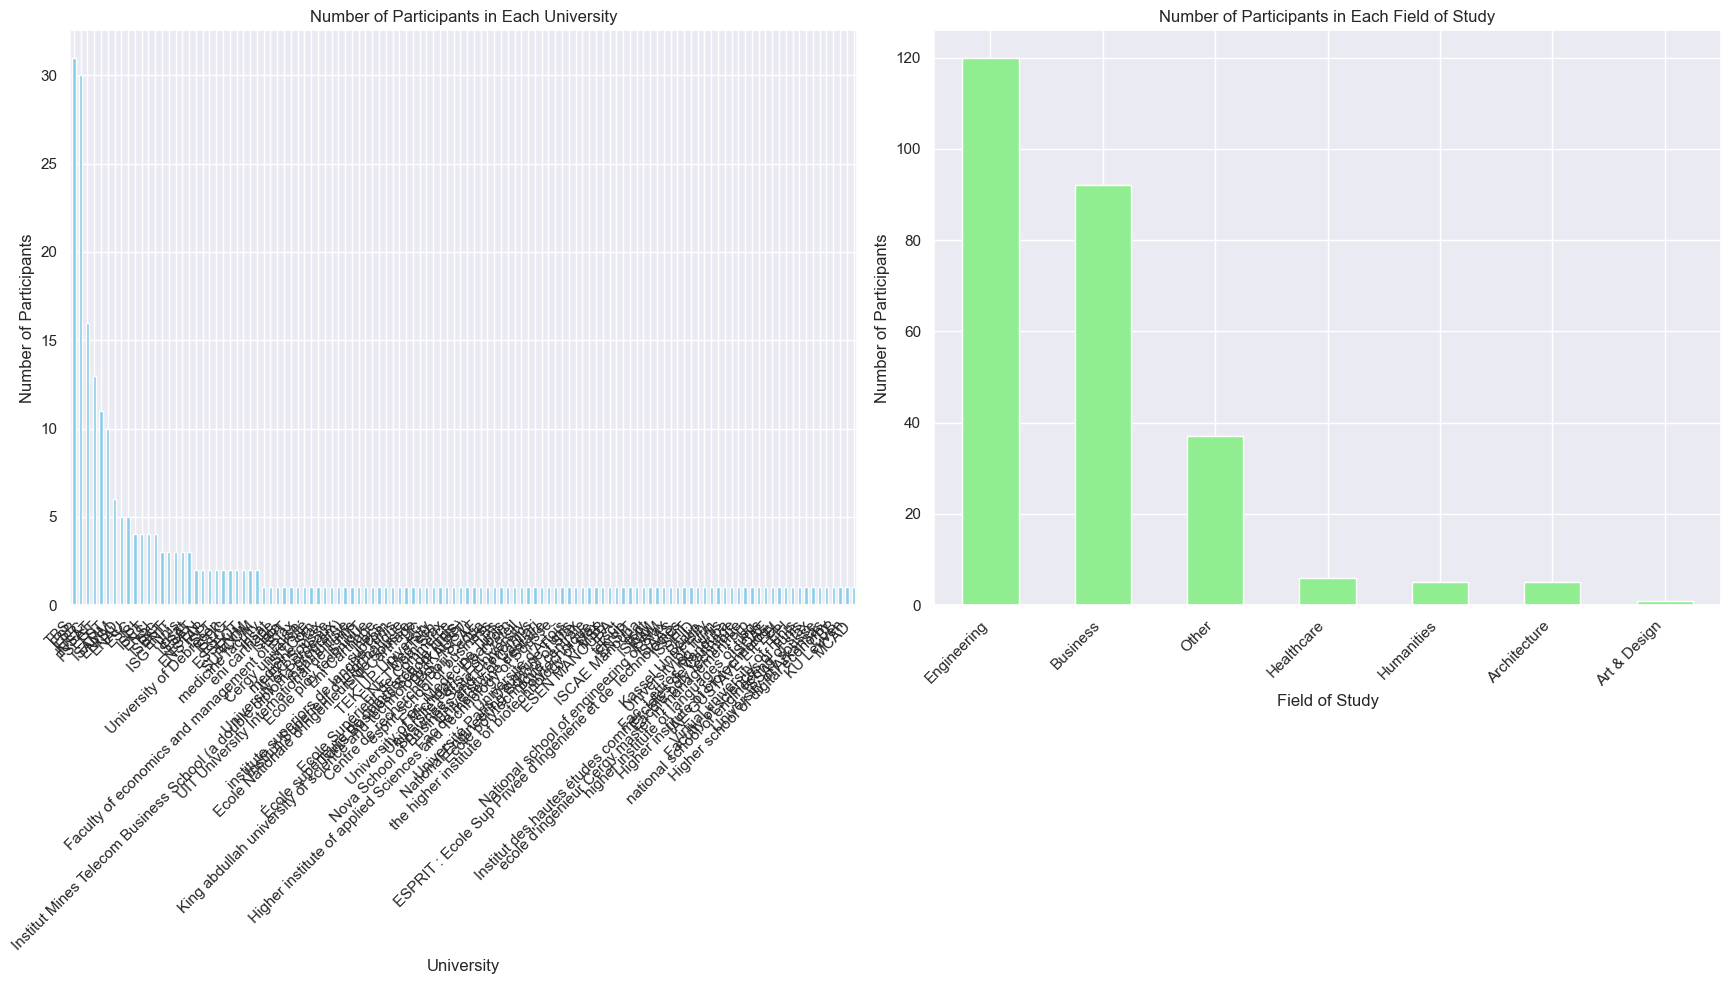

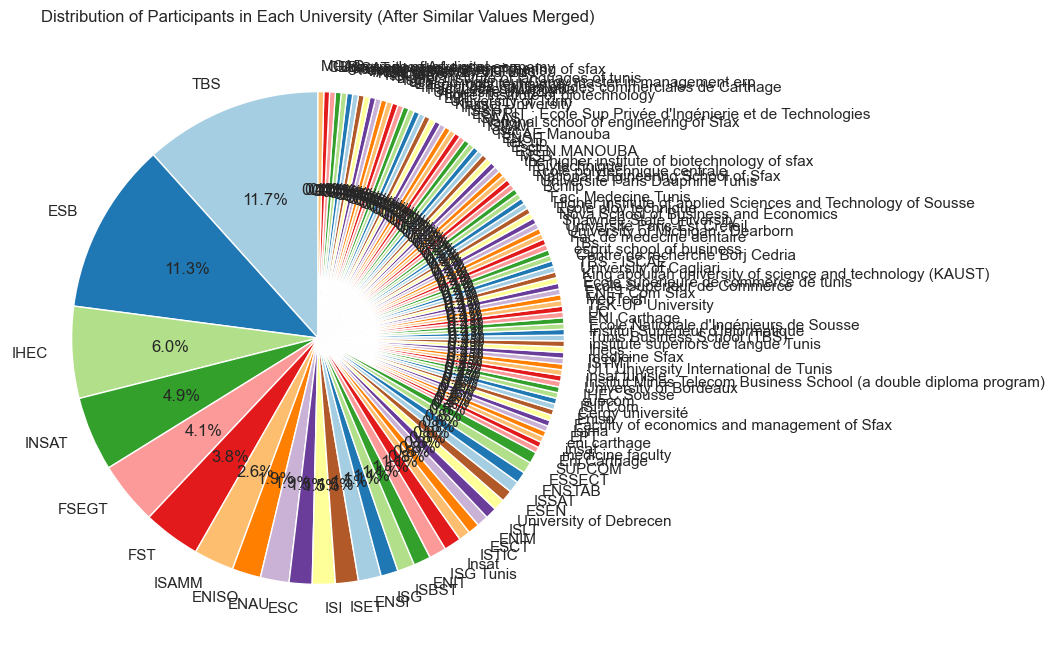

In [50]:
# Count the number of participants in each university
university_counts = df['What is your university?'].value_counts()

# Count the number of participants in each field of study
field_counts = df['What is your field of study?'].value_counts()

# Plot the data
plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
university_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Participants in Each University')
plt.xlabel('University')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
field_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Participants in Each Field of Study')
plt.xlabel('Field of Study')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()





df['What is your university?'] = df['What is your university?'].replace(value_mapping)

# Count the occurrences of each university after replacement
university_counts = df['What is your university?'].value_counts()

# Plot the data in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(university_counts, labels=university_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Participants in Each University (After Similar Values Merged)')
plt.show()

In [51]:
# Plot the data in a bar chart
plt.figure(figsize=(10, 6))
degree_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Degree Levels Among Participants')
plt.xlabel('Degree Level')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha='right')
plt.show()


NameError: name 'degree_counts' is not defined

<Figure size 1000x600 with 0 Axes>

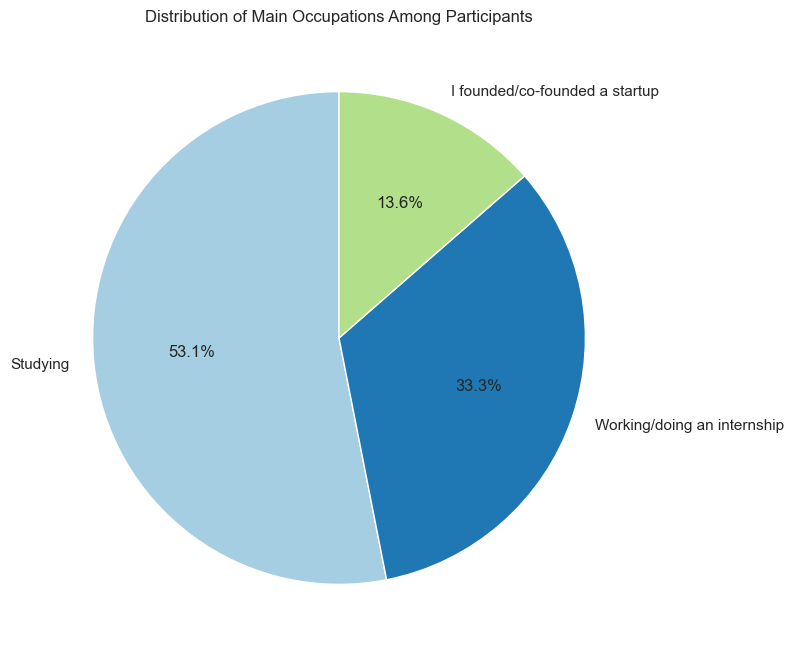

In [ ]:
occupation_counts = df['What is your main occupation?'].value_counts()

# Plot the data in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Main Occupations Among Participants')
plt.show()

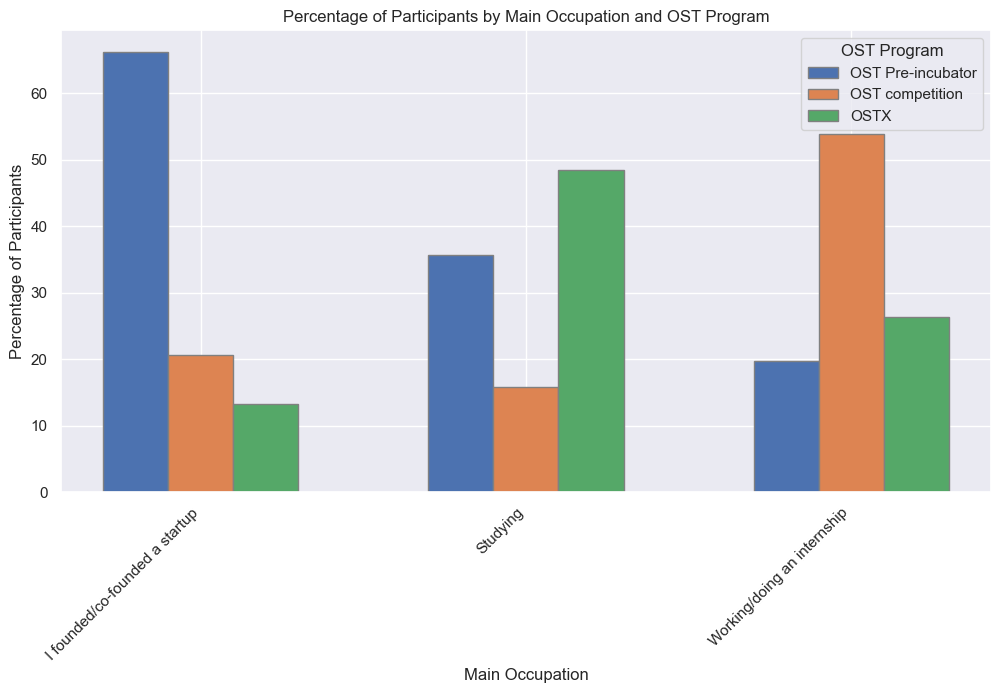

In [ ]:
# Group by main occupation and calculate the percentage of participants for each OST program
occupation_ost_percentages = df.groupby('What is your main occupation?')['How did you join the OST family?'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot the data in a grouped bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.2

# Position for the bars
r = range(len(occupation_ost_percentages))

for i, program in enumerate(occupation_ost_percentages.columns):
    plt.bar([x + i * bar_width for x in r], occupation_ost_percentages[program], width=bar_width, edgecolor='grey', label=program)

plt.xticks([r + bar_width for r in range(len(occupation_ost_percentages))], occupation_ost_percentages.index, rotation=45, ha='right')

plt.xlabel('Main Occupation')
plt.ylabel('Percentage of Participants')
plt.title('Percentage of Participants by Main Occupation and OST Program')
plt.legend(title='OST Program')
plt.show()

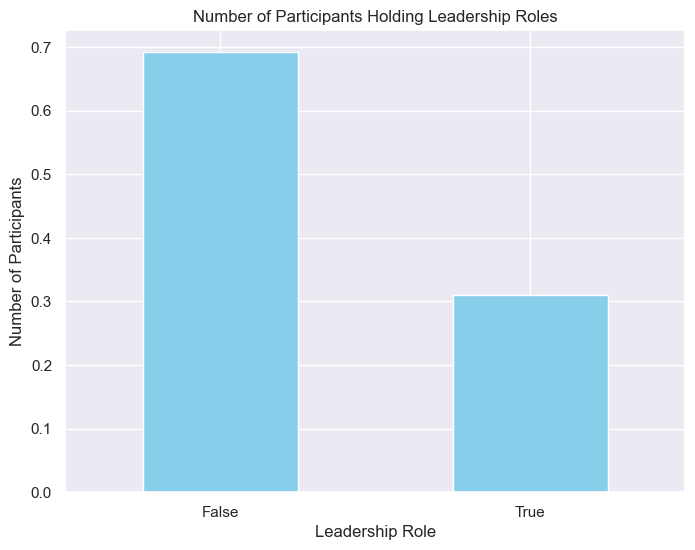

In [ ]:
# Count the number of participants holding leadership roles
leadership_counts = (df['After OST, are you holding a leadership role in any organization?']== True).value_counts()/500

# Plot the data in a bar chart
plt.figure(figsize=(8, 6))
leadership_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Participants Holding Leadership Roles')
plt.xlabel('Leadership Role')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.show()

C:\Users\Dorra\AppData\Local\Temp\ipykernel_2260\816634985.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['How involved are you in extra-curricular activities?'].fillna('0', inplace=True)


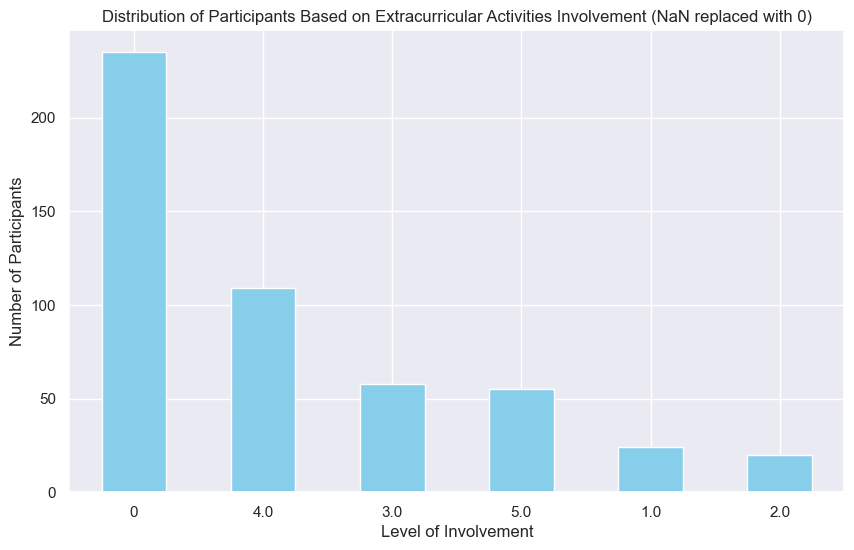

In [ ]:
# Assuming the levels are strings from '1' to '5', if they are integers, convert them to strings
from matplotlib import pyplot as plt


df['How involved are you in extra-curricular activities?'] = df['How involved are you in extra-curricular activities?']

# Replace NaN values with 0
df['How involved are you in extra-curricular activities?'].fillna('0', inplace=True)

# Count the number of participants based on their involvement in extracurricular activities
activity_counts = df['How involved are you in extra-curricular activities?'].value_counts()

# Plot the data in a bar chart
plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Participants Based on Extracurricular Activities Involvement (NaN replaced with 0)')
plt.xlabel('Level of Involvement')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.show()

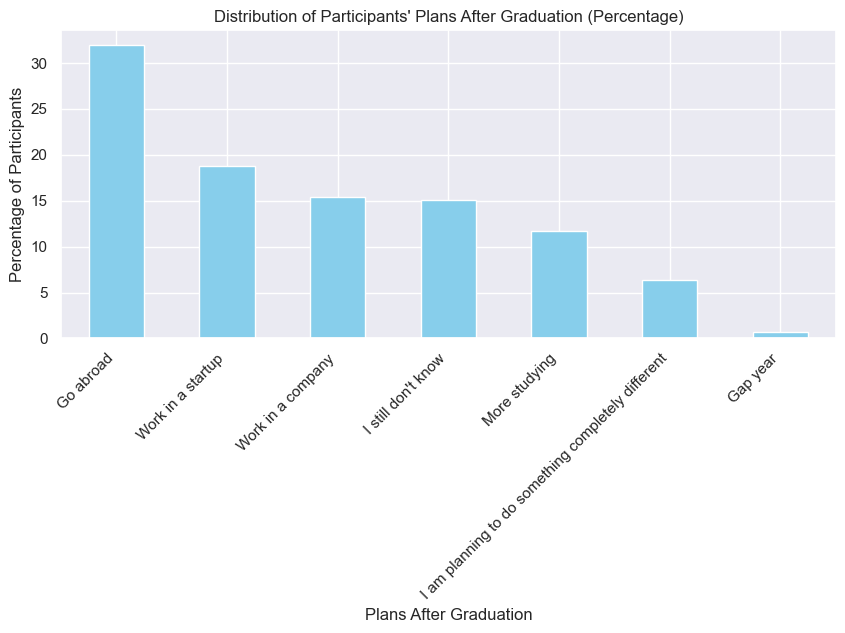

In [ ]:
# Count the number of participants based on their plans after graduation
plans_counts = df['What are your plans after graduation?'].value_counts()

# Calculate the percentage of participants for each plan
plans_percentages = plans_counts / plans_counts.sum() * 100

# Plot the data in a bar chart
plt.figure(figsize=(10, 4))
plans_percentages.plot(kind='bar', color='skyblue')
plt.title('Distribution of Participants\' Plans After Graduation (Percentage)')
plt.xlabel('Plans After Graduation')
plt.ylabel('Percentage of Participants')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.show()

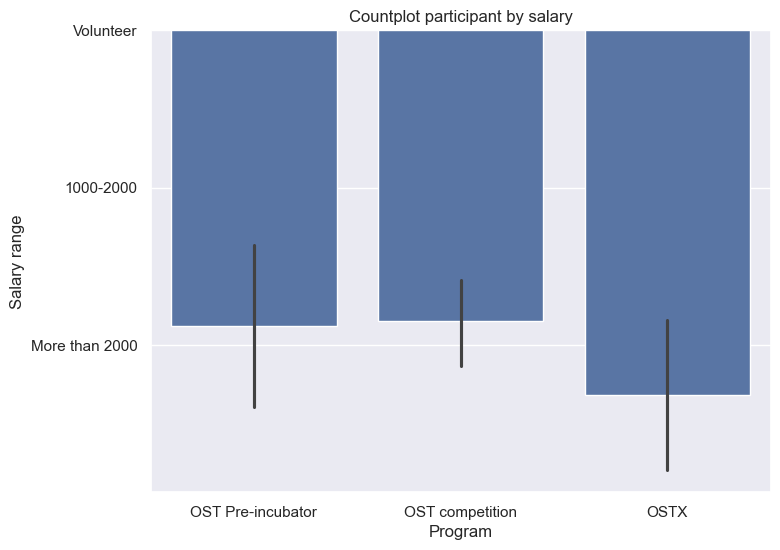

In [ ]:
import matplotlib.pyplot as plt
salary = df.sort_values(by='What is your salary level (in TND)?', ascending=True)[:7000]
figure = plt.figure(figsize=(8,6))
sns.barplot(y=df['What is your salary level (in TND)?'], x=df['How did you join the OST family?'])
plt.xticks()
plt.xlabel('Program')
plt.ylabel('Salary range')
plt.title('Countplot participant by salary')
plt.show()

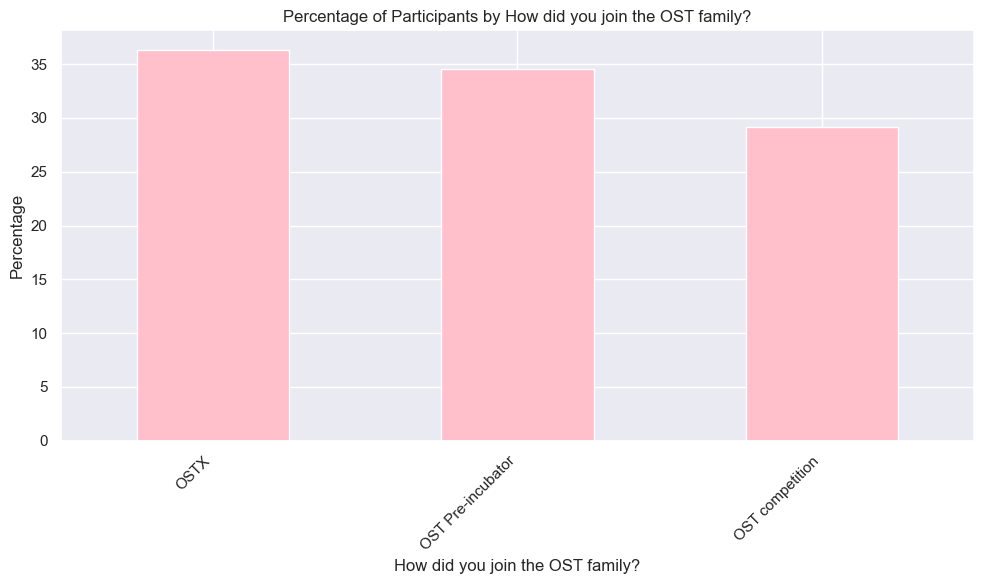

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
column_name = 'How did you join the OST family?'

# Calculate the percentage of each category
category_percentages = df[column_name].value_counts(normalize=True) * 100

# Plot the data
plt.figure(figsize=(10, 6))
category_percentages.plot(kind='bar', color='pink')
plt.title(f'Percentage of Participants by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


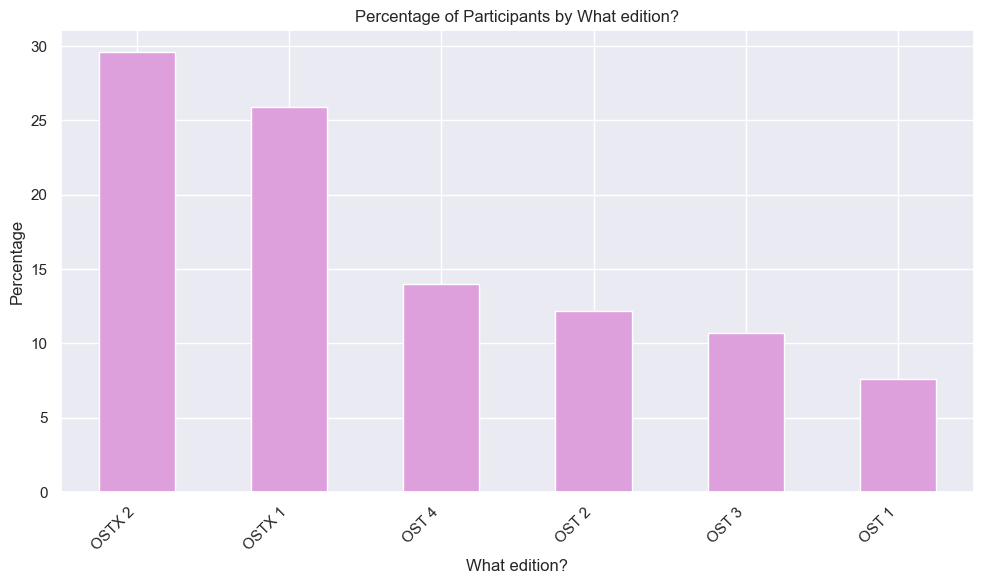

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
column_name = 'What edition?'

# Calculate the percentage of each edition
edition_percentages = df[column_name].value_counts(normalize=True) * 100

# Plot the data
plt.figure(figsize=(10, 6))
edition_percentages.plot(kind='bar', color='plum')
plt.title(f'Percentage of Participants by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


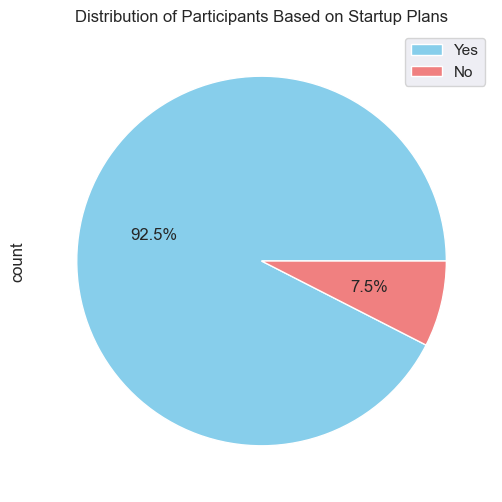

<Figure size 1400x2000 with 0 Axes>

c:\py_installation\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


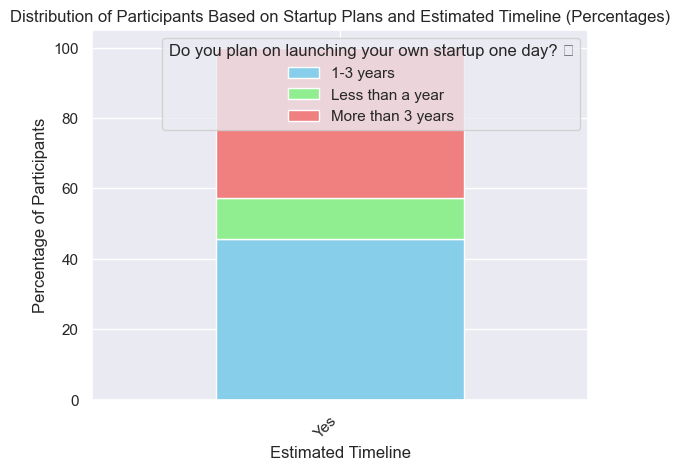

In [ ]:
# Count the number of participants based on their plan to launch a startup
startup_counts = df['Do you plan on launching your own startup one day? 🚀'].value_counts()

# Plot the data in a pie chart
plt.figure(figsize=(6, 6))
startup_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], labels=None)
plt.title('Distribution of Participants Based on Startup Plans')
plt.legend(labels=startup_counts.index, loc='upper right')
plt.show()





# Count the number of participants based on their plan to launch a startup and the estimated timeline

startup_counts = df.groupby(['Do you plan on launching your own startup one day? 🚀', 'Please tell us about your estimated timeline']).size().unstack()

# Calculate the percentage of participants for each category
startup_percentages = startup_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the data in a stacked bar chart
plt.figure(figsize=(14, 20))
startup_percentages.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'pink'])
plt.title('Distribution of Participants Based on Startup Plans and Estimated Timeline (Percentages)')
plt.xlabel('Estimated Timeline')
plt.ylabel('Percentage of Participants')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.legend(title='Do you plan on launching your own startup one day? 🚀', loc='upper right')
plt.show()

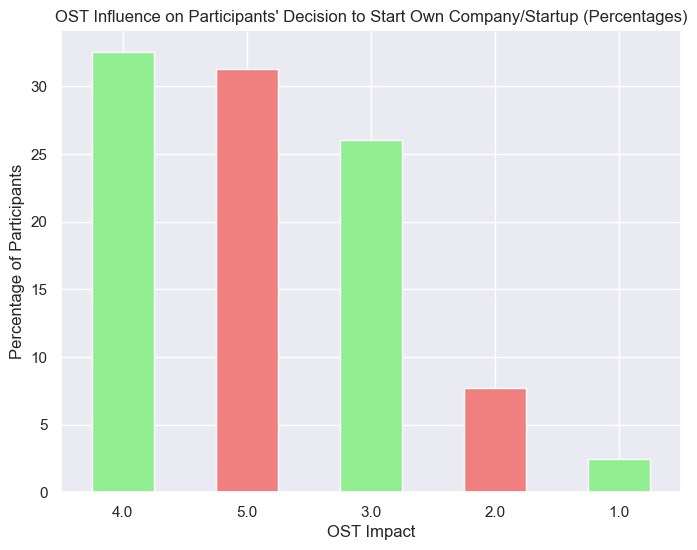

In [ ]:
# Count the number of participants based on the impact of OST on their decision to start a company
ost_impact_counts = df['Did OST have an impact on your decision to start your own company/startup?'].value_counts()

# Calculate the percentage of participants for each category
ost_impact_percentages = ost_impact_counts / ost_impact_counts.sum() * 100

# Plot the data in a bar chart
plt.figure(figsize=(8, 6))
ost_impact_percentages.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('OST Influence on Participants\' Decision to Start Own Company/Startup (Percentages)')
plt.xlabel('OST Impact')
plt.ylabel('Percentage of Participants')
plt.xticks(rotation=0)  # Adjust rotation for better visibility
plt.show()

<Figure size 2000x800 with 0 Axes>

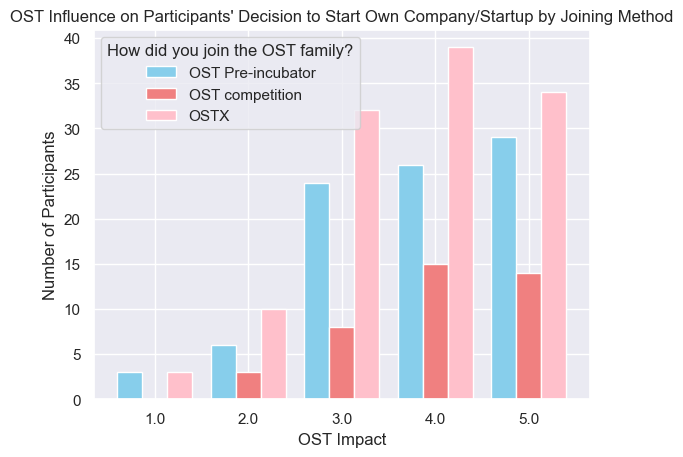

In [ ]:
# Create a DataFrame with relevant columns
df_subset = df[['Did OST have an impact on your decision to start your own company/startup?', 'How did you join the OST family?']]

# Count the number of participants based on the impact of OST and the way they joined the OST family
ost_influence_counts = df_subset.groupby(['Did OST have an impact on your decision to start your own company/startup?', 'How did you join the OST family?']).size().unstack()

# Plot the data in a grouped bar chart
plt.figure(figsize=(20, 8))
ost_influence_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'pink'], width=0.8)
plt.title('OST Influence on Participants\' Decision to Start Own Company/Startup by Joining Method')
plt.xlabel('OST Impact')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)  # Adjust rotation for better visibility
plt.legend(title='How did you join the OST family?', loc='upper left')
plt.show()

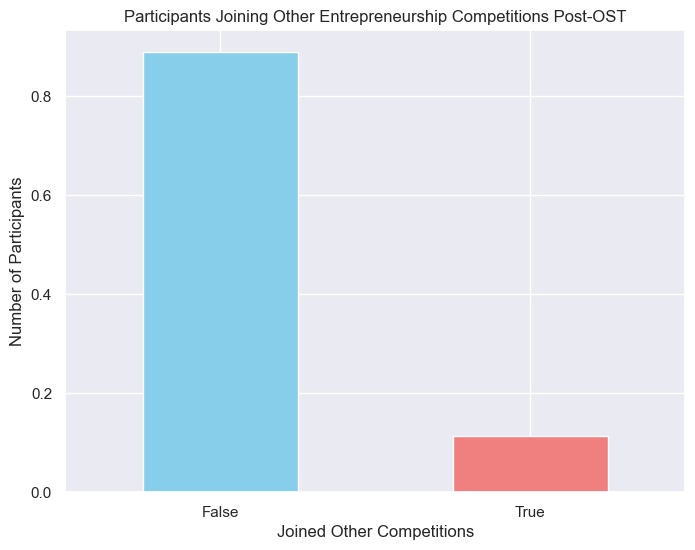

In [ ]:
# Count the number of participants based on whether they joined any other entrepreneurship competition post-OST
joined_comp_counts = (df['After OST, did you join any other entrepreneurship competition?']==True).value_counts()/500


# Plot the data in a bar chart
plt.figure(figsize=(8, 6))
joined_comp_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Participants Joining Other Entrepreneurship Competitions Post-OST')
plt.xlabel('Joined Other Competitions')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)  # Adjust rotation for better visibility
plt.show()

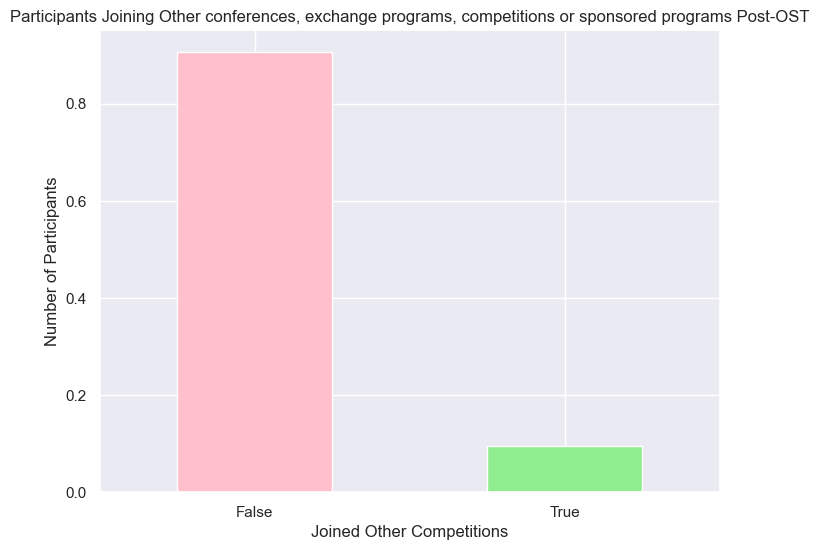

In [ ]:
# Count the number of participants based on whether they joined any other entrepreneurship competition post-OST
joined_comp_counts = (df['After OST, did you participate in any conferences, exchange programs, competitions or sponsored programs?']==True).value_counts()/500


# Plot the data in a bar chart
plt.figure(figsize=(8, 6))
joined_comp_counts.plot(kind='bar', color=['pink', 'lightgreen'])
plt.title('Participants Joining Other conferences, exchange programs, competitions or sponsored programs Post-OST')
plt.xlabel('Joined Other Competitions')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)  # Adjust rotation for better visibility
plt.show()

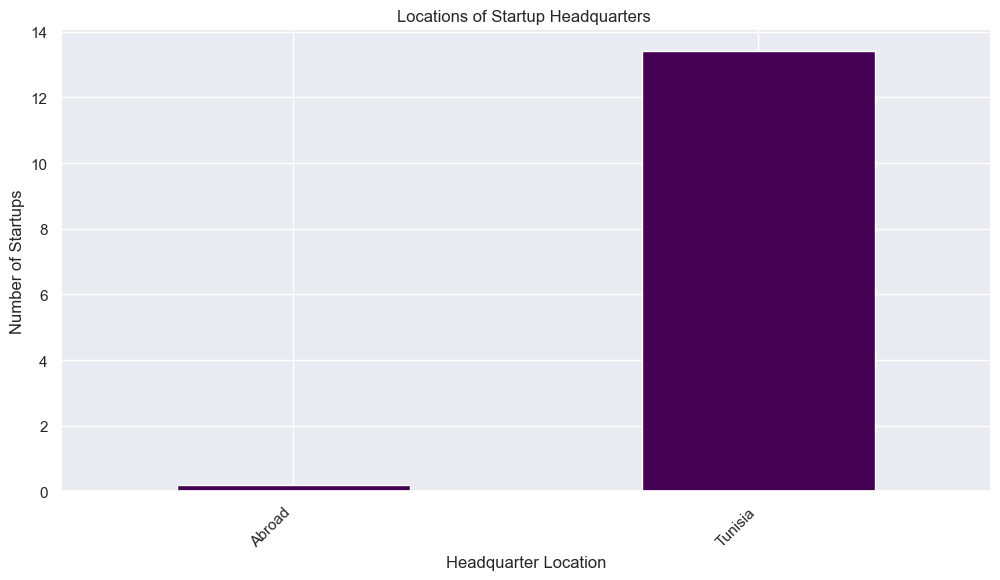

In [ ]:

# Create a DataFrame with relevant columns
df_subset = df[['Where is your startup\'s headquarter located?']]

# Count the number of startups based on the location of the headquarters and international plans
startup_counts = df_subset.groupby(['Where is your startup\'s headquarter located?']).size()/500*100

# Plot the data in a bar chart
plt.figure(figsize=(12, 6))
startup_counts.plot(kind='bar', colormap='viridis')
plt.title('Locations of Startup Headquarters ')
plt.xlabel('Headquarter Location')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
# plt.legend(title='International Plans', loc='upper right')
plt.show()

<Figure size 1200x1200 with 0 Axes>

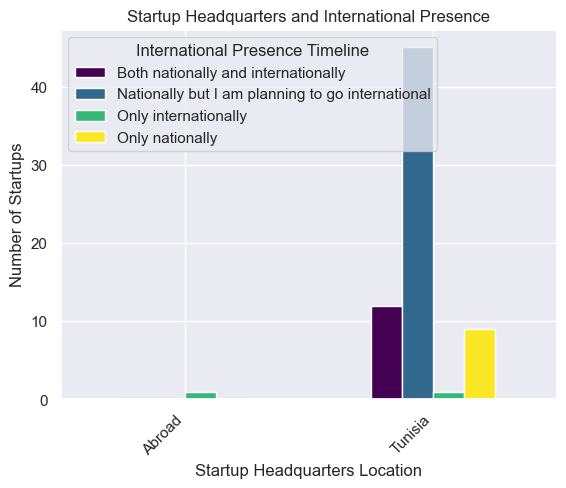

In [ ]:
# Select relevant columns
location_columns = ['Where is your startup\'s headquarter located?', 'Where are you selling your products/offering your services?']
location_df = df[location_columns]

# Count the number of startups based on the location of the headquarters and international plans
location_counts = location_df.groupby(['Where is your startup\'s headquarter located?', 'Where are you selling your products/offering your services?']).size().unstack()

# Plot the data in a grouped bar chart
plt.figure(figsize=(12, 12))
location_counts.plot(kind='bar', colormap='viridis')
plt.title('Startup Headquarters and International Presence')
plt.xlabel('Startup Headquarters Location')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.legend(title='International Presence Timeline', loc='upper left')
plt.show()

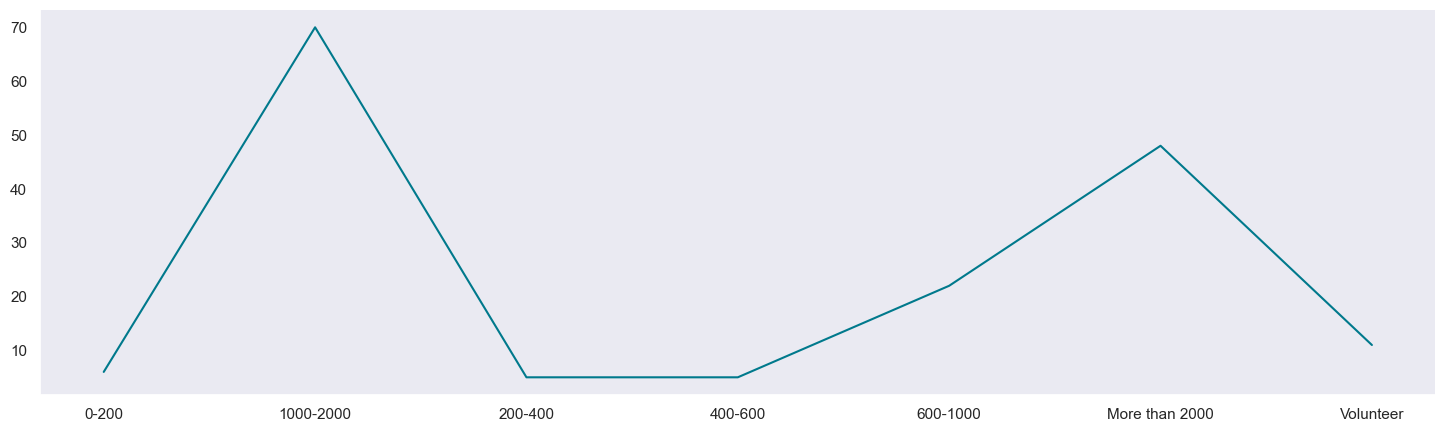

In [ ]:
built_HDI= df['What is your salary level (in TND)?'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.plot(built_HDI.index, built_HDI, color='#00798c')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

<Figure size 1400x700 with 0 Axes>

c:\py_installation\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


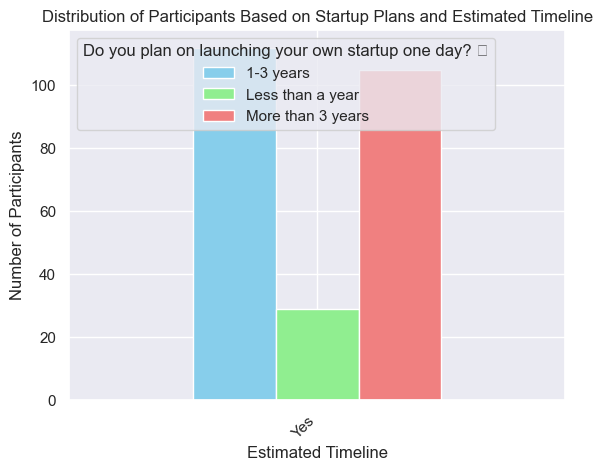

In [ ]:
# Count the number of participants based on their plan to launch a startup and the estimated timeline
startup_counts = df.groupby(['Do you plan on launching your own startup one day? 🚀', 'Please tell us about your estimated timeline']).size().unstack()

# Plot the data in a bar chart
plt.figure(figsize=(14, 7))
startup_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'pink'])
plt.title('Distribution of Participants Based on Startup Plans and Estimated Timeline')
plt.xlabel('Estimated Timeline')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.legend(title='Do you plan on launching your own startup one day? 🚀', loc='upper left')
plt.show()

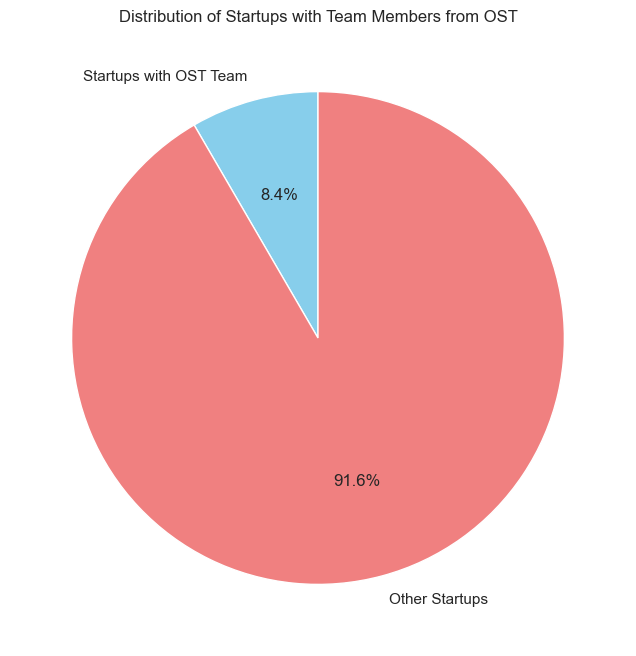

In [ ]:
team_from_ost_column = 'Does your team include members you met or worked with through OST?'

# Count the number of startups
total_startups = df.shape[0]

# Count the number of startups where the team includes members from OST
startups_with_ost_team = df[df[team_from_ost_column] == True]
ost_team_count = startups_with_ost_team.shape[0]

# Count the number of other startups
other_startups_count = total_startups - ost_team_count

# Plot the data in a pie chart
labels = ['Startups with OST Team', 'Other Startups']
sizes = [ost_team_count, other_startups_count]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Startups with Team Members from OST')
plt.show()

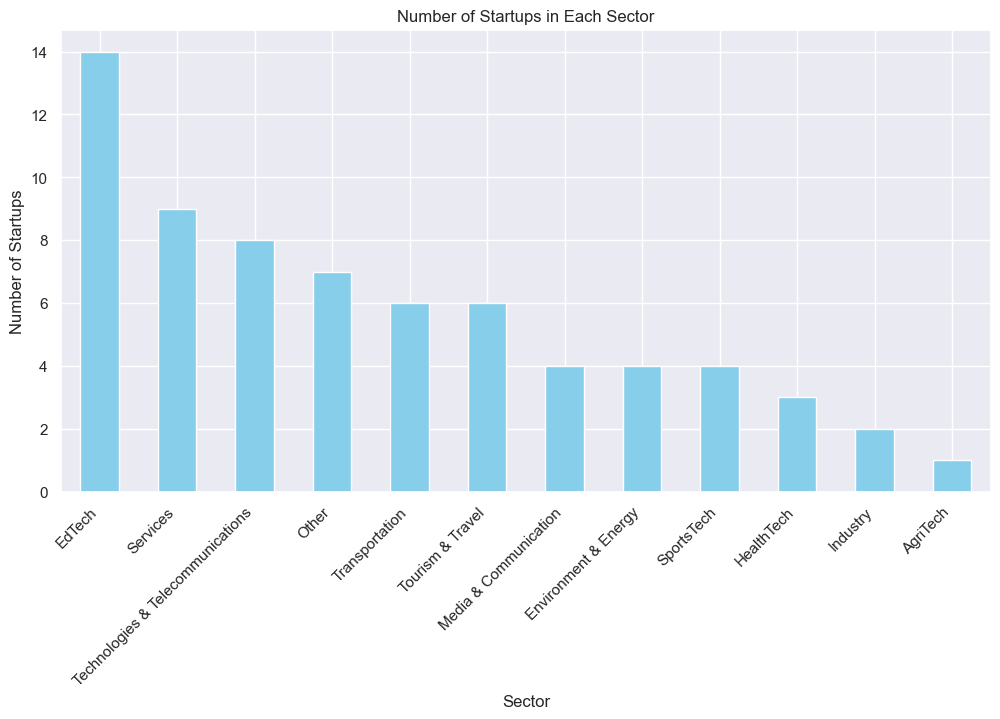

In [ ]:
sector_column = 'What is your sector of activity?'

# Plot the number of startups in each sector
plt.figure(figsize=(12, 6))
df[sector_column].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Startups in Each Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45, ha='right')
plt.show()

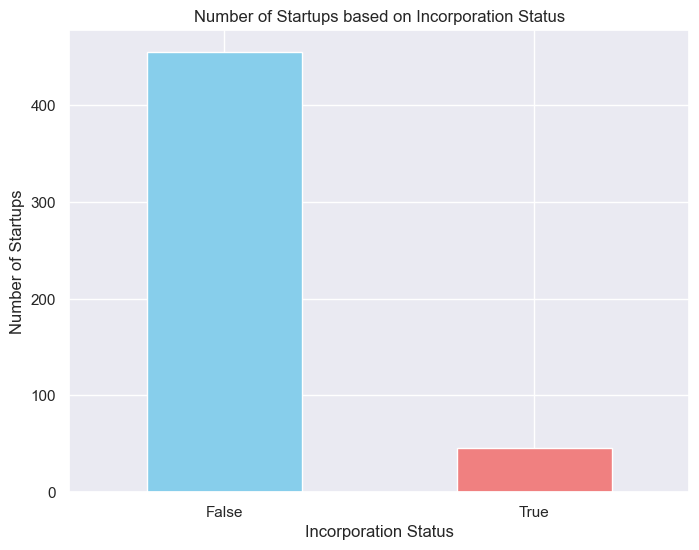

In [ ]:
# Replace this column name with the actual one in your dataset
incorporation_column = 'Have your startup been incorporated?'

# Check if the column exists in the DataFrame
if incorporation_column in df.columns:
    # Count the number of startups based on their incorporation status
    incorporation_counts = (df[incorporation_column]==True).value_counts(dropna=False)

    # Plot a bar chart of startup incorporation status
    plt.figure(figsize=(8, 6))
    incorporation_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
    plt.title('Number of Startups based on Incorporation Status')
    plt.xlabel('Incorporation Status')
    plt.ylabel('Number of Startups')
    plt.xticks(rotation=0)
    plt.show()


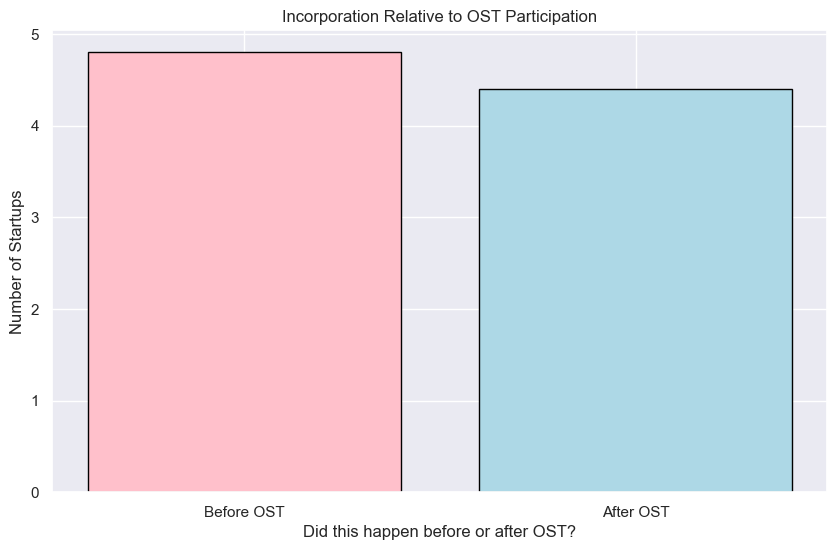

In [ ]:
# Filter the DataFrame for startups that have been incorporated
incorporated_startups = df[df['Have your startup been incorporated?'] == True]

# Count the occurrences of each category
counts = (incorporated_startups['Did this happen before or after OST?'].value_counts()/500)*100

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color=['pink', 'lightblue'], edgecolor='black')
plt.title('Incorporation Relative to OST Participation')
plt.xlabel('Did this happen before or after OST?')
plt.ylabel('Number of Startups')
plt.show()


Percentage of participants with startups that applied for a patent:
Did you apply for a patent?
Yes and I got it!                      47.826087
No                                     26.086957
No, but I am planning to apply         15.217391
Yes, but the application is ongoing    10.869565
Name: count, dtype: float64


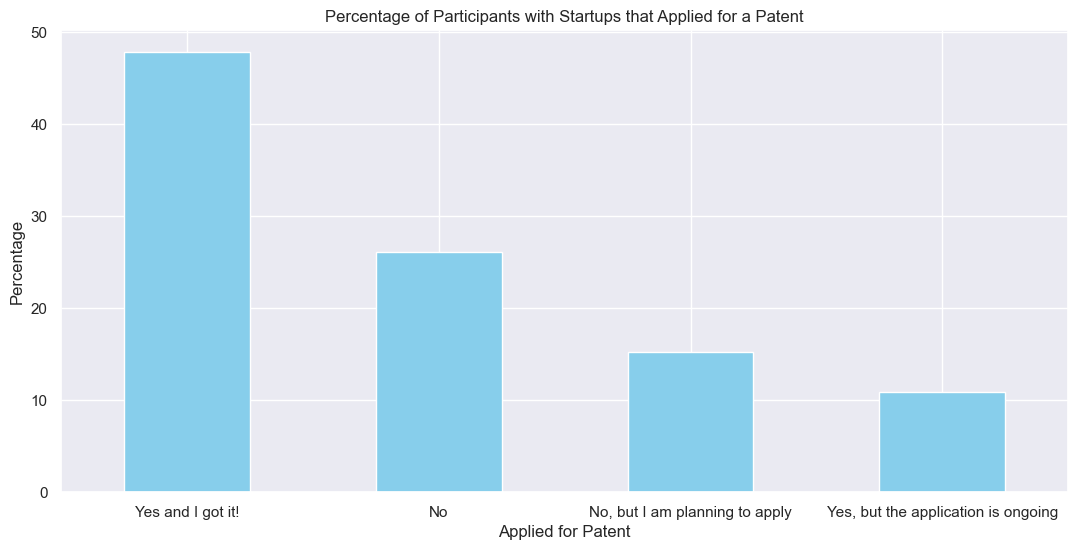

In [ ]:
startup_participants = df[df['Have your startup been incorporated?'] == True]

# Count the occurrences of whether they applied for a patent
patent_counts = startup_participants['Did you apply for a patent?'].value_counts()

# Calculate the percentage
percentage_applied_for_patent = (patent_counts / patent_counts.sum()) * 100

# Display the result
print("Percentage of participants with startups that applied for a patent:")
print(percentage_applied_for_patent)


plt.figure(figsize=(13, 6))
percentage_applied_for_patent.plot(kind='bar', color='skyblue')
plt.title('Percentage of Participants with Startups that Applied for a Patent')
plt.xlabel('Applied for Patent')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

C:\Users\Dorra\AppData\Local\Temp\ipykernel_2260\59363874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Did you raise funds for your startup?', data=df, palette='pastel')


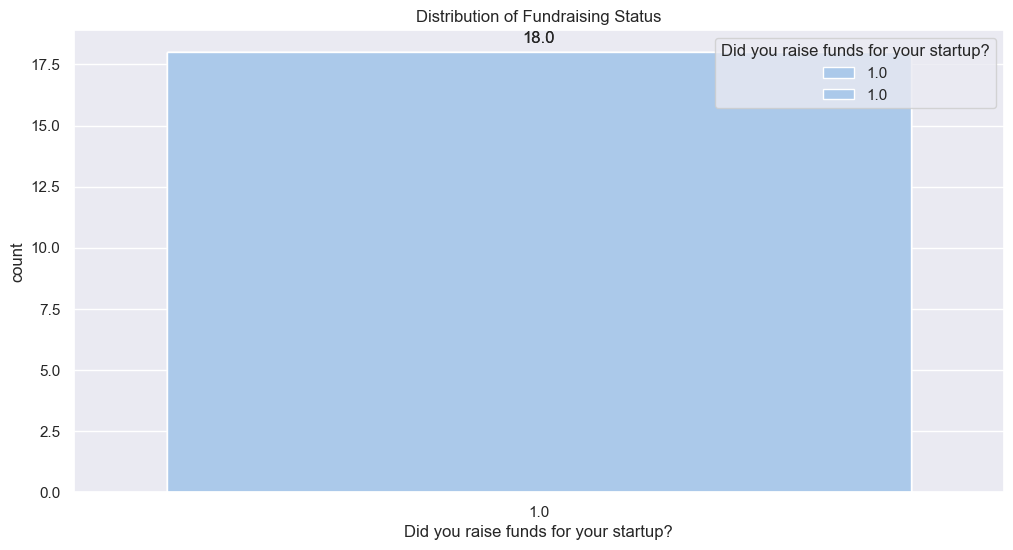

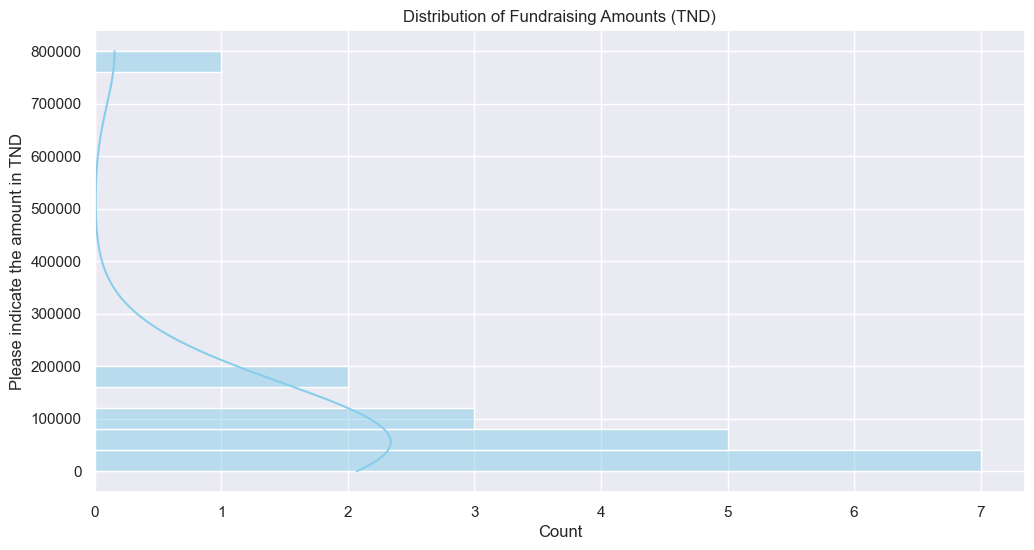

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for fundraising status
plt.figure(figsize=(12, 6))

sns.countplot(x='Did you raise funds for your startup?', data=df, palette='pastel')
plt.title('Distribution of Fundraising Status')

# Display the counts on top of the bars
for p in sns.countplot(x='Did you raise funds for your startup?', data=df).patches:
    sns.countplot(x='Did you raise funds for your startup?', data=df)
    sns.countplot(x='Did you raise funds for your startup?', data=df,palette='pastel', hue='Did you raise funds for your startup?').annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Create a bar chart for fundraising amounts
plt.figure(figsize=(12, 6))

sns.histplot(y='Please indicate the amount in TND', data=df[df['Did you raise funds for your startup?'] == True], bins=20, color='skyblue', kde=True)
plt.title('Distribution of Fundraising Amounts (TND)')

plt.show()




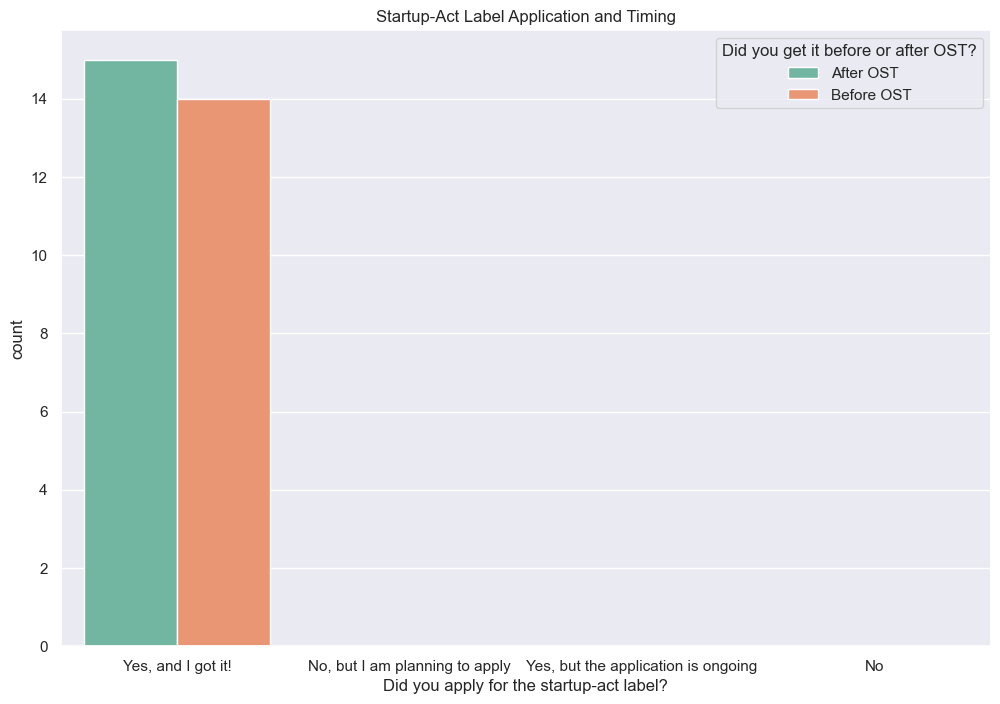

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grouped bar chart for startup-act label application and timing
plt.figure(figsize=(12, 8))

sns.countplot(x='Did you apply for the startup-act label?', hue='Did you get it before or after OST?', data=df, palette='Set2')
plt.title('Startup-Act Label Application and Timing')

plt.show()

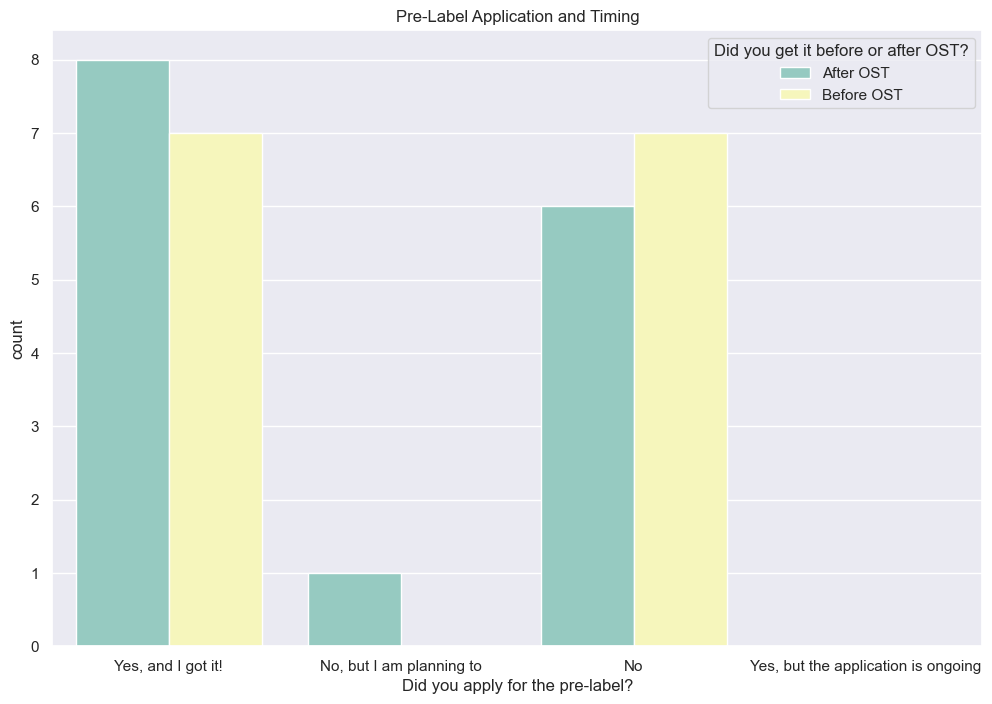

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grouped bar chart for pre-label application and timing
plt.figure(figsize=(12, 8))

sns.countplot(x='Did you apply for the pre-label?', hue='Did you get it before or after OST?', data=df, palette='Set3')
plt.title('Pre-Label Application and Timing')

plt.show()


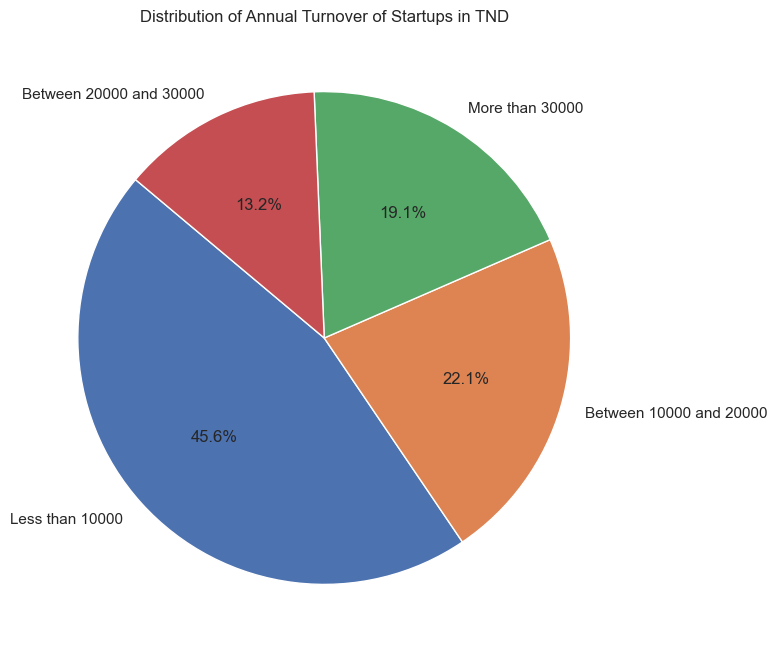

In [ ]:
import matplotlib.pyplot as plt

# Filter out null values
filtered_df = df.dropna(subset=['What is the approximate annual turnover of your startup in TND?'])

# Calculate the percentage of startups in each turnover category
turnover_percentages = filtered_df['What is the approximate annual turnover of your startup in TND?'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(turnover_percentages, labels=turnover_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Annual Turnover of Startups in TND')
plt.show()


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
column_name = 'Finally, do you have any suggestions on how OST can support you in your journey?'

# Extract the values from the specified column and drop NaN values
suggestions_values = df[column_name].dropna()

# Create a DataFrame with the non-null values
table_df = pd.DataFrame({column_name: suggestions_values})

# Display the table
table_df

,"Finally, do you have any suggestions on how OST can support you in your journey?"
1,Just stay tuned and continue the great work
2,I believe that OST will help me sharpen my ent...
6,I think if OST could always make gathering bet...
13,More tranings
15,already supported
...,...
487,No thank you
489,No thank you
492,Provide apprenticeship opportunities.
494,Connect startups with more opportunities such ...


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
column_name = 'Finally, do you have any suggestions on how OST can support you in your journey?'

# Chosen value to check for in the strings
chosen_value = 'training'

# Extract the values from the specified column and drop NaN values
suggestions_values = df[column_name].dropna()

# Count the number of strings containing the chosen value
count_containing_value = sum(s.lower().count(chosen_value.lower()) > 0 for s in suggestions_values)

# Display the count
print(f"Number of strings containing '{chosen_value}': {count_containing_value}")


Number of strings containing 'training': 13


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
column_name = 'Finally, do you have any suggestions on how OST can support you in your journey?'

# Chosen value to check for in the strings
chosen_value = 'supported'

# Extract the values from the specified column and drop NaN values
suggestions_values = df[column_name].dropna()

# Count the number of strings containing the chosen value
count_containing_value = sum(s.lower().count(chosen_value.lower()) > 0 for s in suggestions_values)

# Display the count
print(f"Number of strings containing '{chosen_value}': {count_containing_value}")

Number of strings containing 'supported': 2


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
column_name = 'Finally, do you have any suggestions on how OST can support you in your journey?'

# Chosen value to check for in the strings
chosen_value = 'job'

# Extract the values from the specified column and drop NaN values
suggestions_values = df[column_name].dropna()

# Count the number of strings containing the chosen value
count_containing_value = sum(s.lower().count(chosen_value.lower()) > 0 for s in suggestions_values)

# Display the count
print(f"Number of strings containing '{chosen_value}': {count_containing_value}")

Number of strings containing 'job': 10


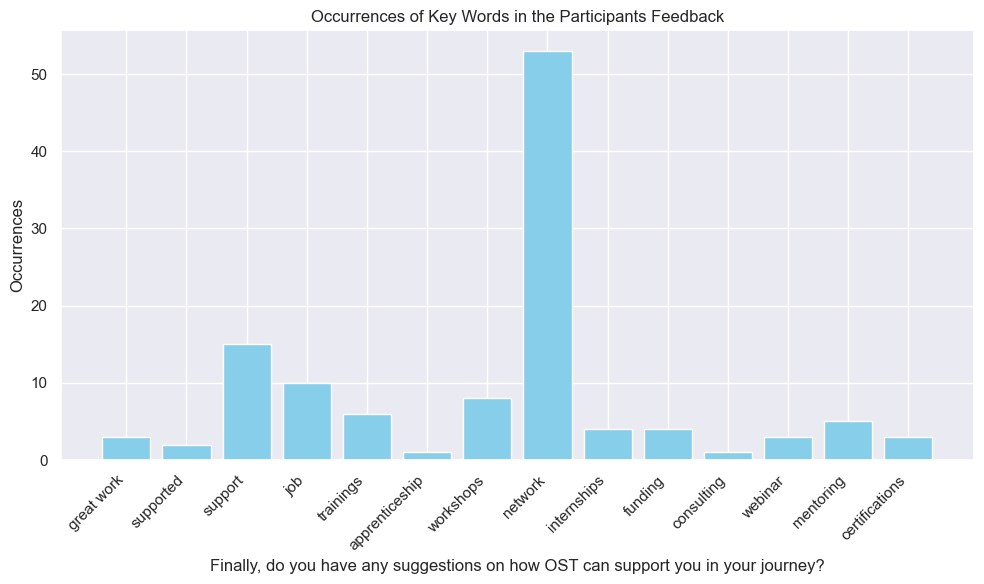

In [ ]:
import matplotlib.pyplot as plt

column_name = 'Finally, do you have any suggestions on how OST can support you in your journey?'

chosen_values = ['great work','supported', 'support', 'job','trainings','apprenticeship', 'workshops', 'network','internships', 'funding', 'consulting','webinar', 'mentoring', 'certifications' ] 

# Extract the suggestions and count occurrences of chosen values
suggestions_values = df[column_name].dropna()
value_counts = {value: suggestions_values.str.contains(value, case=False, na=False).sum() for value in chosen_values}

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(value_counts.keys(), value_counts.values(), color='skyblue')
plt.title(f'Occurrences of Key Words in the Participants Feedback')
plt.xlabel(column_name)
plt.ylabel('Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


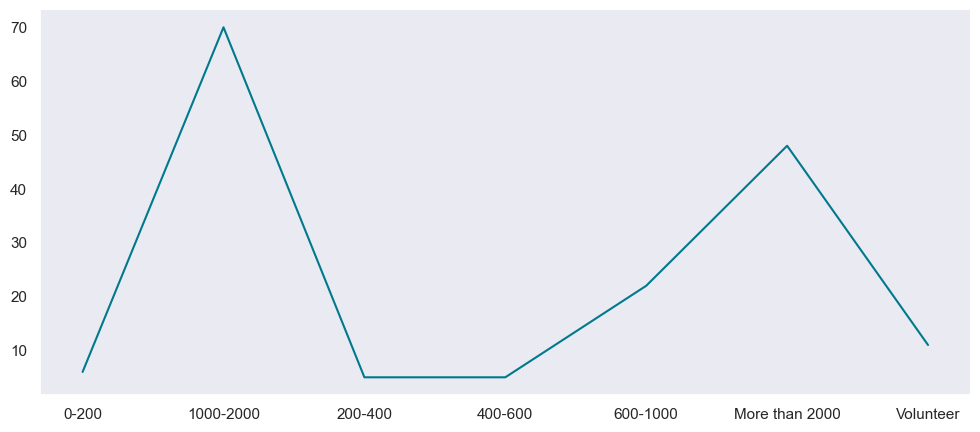

In [ ]:
built_HDI= df['What is your salary level (in TND)?'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

ax.plot(built_HDI.index, built_HDI, color='#00798c')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

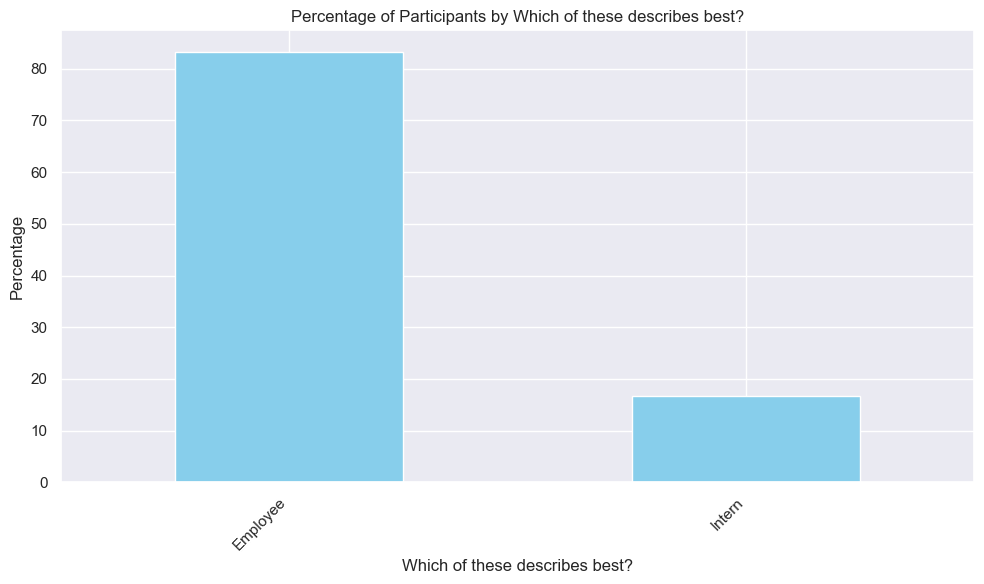

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
column_name = 'Which of these describes best?'

# Calculate the percentage of each category
category_percentages = df[column_name].value_counts(normalize=True) * 100

# Plot the data
plt.figure(figsize=(10, 6))
category_percentages.plot(kind='bar', color='skyblue')
plt.title(f'Percentage of Participants by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


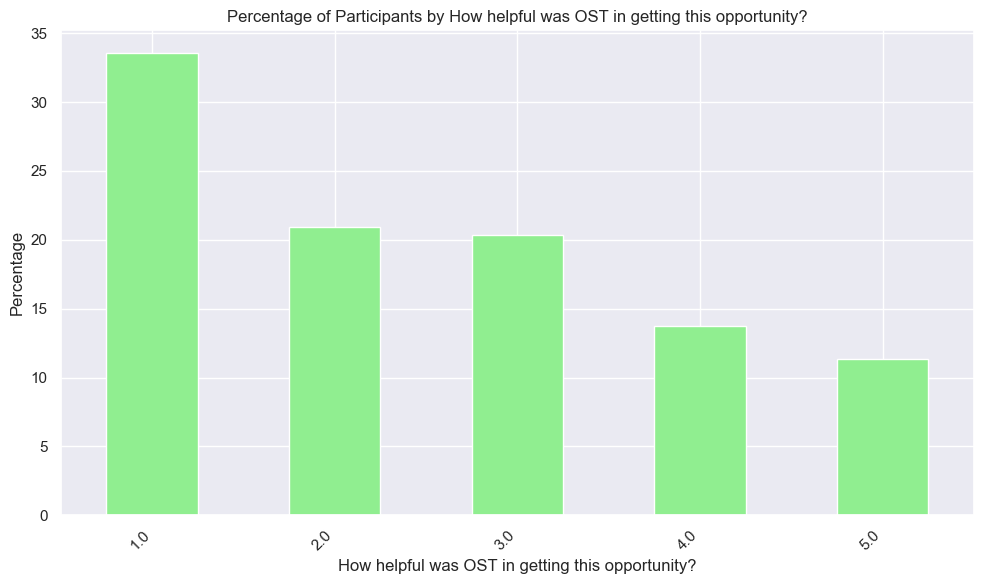

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
column_name = 'How helpful was OST in getting this opportunity?'

# Calculate the percentage of each category
category_percentages = df[column_name].value_counts(normalize=True) * 100

# Plot the data
plt.figure(figsize=(10, 6))
category_percentages.plot(kind='bar', color='lightgreen')
plt.title(f'Percentage of Participants by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
